In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# Sets the seed for generating random numbers. Returns a torch.Generator object.
torch.manual_seed(1)

In [4]:
word_to_ix = {"hello":0, "world":1}

In [7]:
embeds = nn.Embedding(2,5)
# 2 words in voca, 5 dimensional embeddings (5는 내가 설정하기 나름이다.)

In [8]:
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)

In [12]:
print(lookup_tensor, type(lookup_tensor))

tensor([0]) <class 'torch.Tensor'>


In [9]:
hello_embed = embeds(lookup_tensor)

In [10]:
print(hello_embed)
# 2, 5 차원으로 나타나졌다.

tensor([[ 3.5870, -1.8313,  1.5987, -1.2770,  0.3255]],
       grad_fn=<EmbeddingBackward0>)


In [14]:
test = embeds(word_to_ix["hello"])

# Error : argument 'indices' (position 2) must be Tensor, not int Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not int

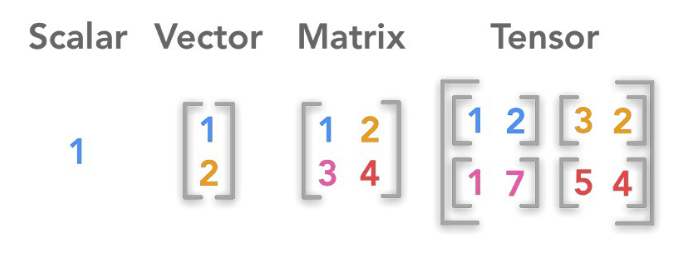

# N-Gram Language Modeling

In [22]:
CONTEXT_SIZE = 4
EMBEDDING_DIM = 10

In [32]:
test_sentence = """Jiseon When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

In [33]:
test_sentence

['Jiseon',
 'When',
 'forty',
 'winters',
 'shall',
 'besiege',
 'thy',
 'brow,',
 'And',
 'dig',
 'deep',
 'trenches',
 'in',
 'thy',
 "beauty's",
 'field,',
 'Thy',
 "youth's",
 'proud',
 'livery',
 'so',
 'gazed',
 'on',
 'now,',
 'Will',
 'be',
 'a',
 "totter'd",
 'weed',
 'of',
 'small',
 'worth',
 'held:',
 'Then',
 'being',
 'asked,',
 'where',
 'all',
 'thy',
 'beauty',
 'lies,',
 'Where',
 'all',
 'the',
 'treasure',
 'of',
 'thy',
 'lusty',
 'days;',
 'To',
 'say,',
 'within',
 'thine',
 'own',
 'deep',
 'sunken',
 'eyes,',
 'Were',
 'an',
 'all-eating',
 'shame,',
 'and',
 'thriftless',
 'praise.',
 'How',
 'much',
 'more',
 'praise',
 "deserv'd",
 'thy',
 "beauty's",
 'use,',
 'If',
 'thou',
 'couldst',
 'answer',
 "'This",
 'fair',
 'child',
 'of',
 'mine',
 'Shall',
 'sum',
 'my',
 'count,',
 'and',
 'make',
 'my',
 'old',
 "excuse,'",
 'Proving',
 'his',
 'beauty',
 'by',
 'succession',
 'thine!',
 'This',
 'were',
 'to',
 'be',
 'new',
 'made',
 'when',
 'thou',
 'art',

In [27]:
ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence))
]

In [24]:
print(ngrams[:2])
# P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1} )

[(['shall', 'winters', 'forty', 'When'], 'besiege'), (['besiege', 'shall', 'winters', 'forty'], 'thy')]


In [34]:
vocab = set(test_sentence)
print(vocab)
# set 을 하면 집합의 개념으로 -> 중복이 제거되고, unique 하게 하나씩만 뽑혀져서 나온다. 

{'old,', 'of', 'To', 'sunken', 'asked,', 'and', 'couldst', 'now,', 'praise.', 'made', 'cold.', 'within', 'be', 'dig', 'to', "youth's", 'shall', 'gazed', 'thine', 'praise', 'Proving', 'thy', 'the', 'forty', 'say,', 'days;', 'brow,', 'see', 'And', 'This', "excuse,'", "'This", 'being', 'Jiseon', 'so', 'If', 'treasure', 'field,', 'more', 'weed', "deserv'd", 'small', 'Thy', 'Where', 'by', 'all', 'use,', 'shame,', 'when', 'sum', 'an', 'blood', 'proud', 'held:', 'Were', 'own', 'fair', 'his', 'new', 'lusty', 'on', 'count,', 'child', 'make', 'When', 'Then', 'all-eating', 'eyes,', 'succession', 'a', 'thriftless', 'deep', 'Will', 'much', 'it', 'answer', "feel'st", 'beauty', 'where', 'How', 'winters', 'besiege', 'my', 'old', 'lies,', 'trenches', 'warm', "totter'd", 'art', 'in', 'were', 'worth', 'thine!', 'livery', 'Shall', 'mine', 'thou', "beauty's"}


In [35]:
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [36]:
word_to_ix
# 라벨 인코딩

{'old,': 0,
 'of': 1,
 'To': 2,
 'sunken': 3,
 'asked,': 4,
 'and': 5,
 'couldst': 6,
 'now,': 7,
 'praise.': 8,
 'made': 9,
 'cold.': 10,
 'within': 11,
 'be': 12,
 'dig': 13,
 'to': 14,
 "youth's": 15,
 'shall': 16,
 'gazed': 17,
 'thine': 18,
 'praise': 19,
 'Proving': 20,
 'thy': 21,
 'the': 22,
 'forty': 23,
 'say,': 24,
 'days;': 25,
 'brow,': 26,
 'see': 27,
 'And': 28,
 'This': 29,
 "excuse,'": 30,
 "'This": 31,
 'being': 32,
 'Jiseon': 33,
 'so': 34,
 'If': 35,
 'treasure': 36,
 'field,': 37,
 'more': 38,
 'weed': 39,
 "deserv'd": 40,
 'small': 41,
 'Thy': 42,
 'Where': 43,
 'by': 44,
 'all': 45,
 'use,': 46,
 'shame,': 47,
 'when': 48,
 'sum': 49,
 'an': 50,
 'blood': 51,
 'proud': 52,
 'held:': 53,
 'Were': 54,
 'own': 55,
 'fair': 56,
 'his': 57,
 'new': 58,
 'lusty': 59,
 'on': 60,
 'count,': 61,
 'child': 62,
 'make': 63,
 'When': 64,
 'Then': 65,
 'all-eating': 66,
 'eyes,': 67,
 'succession': 68,
 'a': 69,
 'thriftless': 70,
 'deep': 71,
 'Will': 72,
 'much': 73,
 'it':

In [37]:
class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))

        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

In [39]:
losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(10):
    total_loss = 0
    for context, target in ngrams:
        